In [1]:
import matplotlib.pyplot as plt
import numpy as np
# die schnellste art zu multiplizieren vs. reguläre schulmethode 

In [2]:
def multiply_bits(a_bit, b_bit):
    if a_bit == "1":
        return b_bit
    else:
        return "0"

In [7]:
# they start with lowest first
def add_bit_strings(a_bit_string, b_bit_string):
    carry = 0
    ptr = 0
    
    res = ""
    
    while ptr < max(len(a_bit_string), len(b_bit_string)):
        a_bit = int(a_bit_string[ptr] if ptr < len(a_bit_string) else "0")
        b_bit = int(b_bit_string[ptr] if ptr < len(b_bit_string) else "0")
        
        res += str((a_bit + b_bit + carry) % 2)
        carry = int((a_bit + b_bit + carry) / 2)
        
        ptr += 1
        
    if carry == 1:
        res += "1"
        return res
    else:
        return res

In [34]:
def school_multiplication(a, b):
    a_bit_string = "{0:b}".format(a)[::-1]
    b_bit_string = "{0:b}".format(b)[::-1]
    
    n_additions = 0
    n_multiplications = 0
    
    temp_mul_string = "0"
    
    # loop slowly over right bits
    for i, b_bit in enumerate(b_bit_string):
        
        temp_bit_string = i * "0"
        # multiply every bit on the right with a bit on the left
        for a_bit in a_bit_string:
            temp_bit_string += multiply_bits(a_bit, b_bit)
            n_multiplications += 1
        
        temp_mul_string = add_bit_strings(temp_mul_string, temp_bit_string)
        n_additions += max(len(temp_mul_string), len(temp_bit_string))
        
    return temp_mul_string, n_additions, n_multiplications

In [62]:
nums = range(10, 1000000, 10)

school_n_additions = []
school_n_multiplications = []

for num in nums:
    res, n_additions, n_multiplications = school_multiplication(num, num)
    school_n_additions.append(n_additions)
    school_n_multiplications.append(n_multiplications)
    
    assert(int(res[::-1], 2) == num * num)

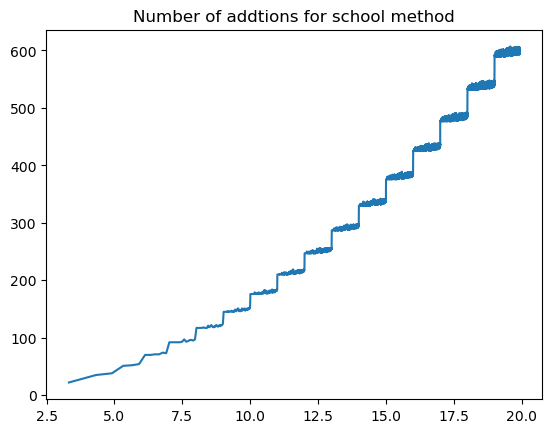

In [65]:
plt.title("Number of addtions for school method")
# the input is n : number of bits and NOT  the number itself
# if you plot the number itself on the x axis, then n grows logarithmically in the size of the number
# and the whole plot becomes a logarithmic one
plt.plot(np.log2(np.array(nums)), np.array(school_n_additions))
plt.show()

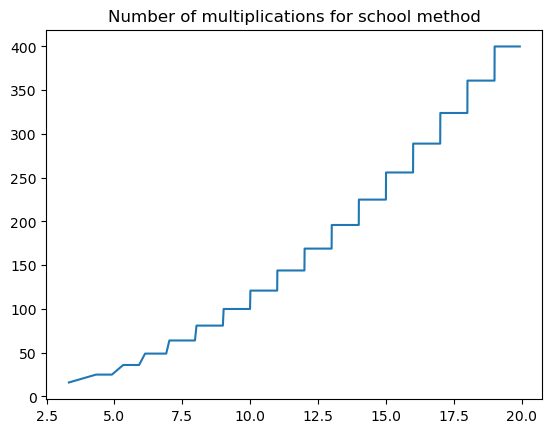

In [66]:
plt.title("Number of multiplications for school method")
plt.plot(np.log2(np.array(nums)), np.array(school_n_multiplications))
plt.show()

In [64]:
# nicht selbst implementiert
# arbeitet mit strings und nicht mit bitshifts
def karatsuba(m,n):
    if(m<10 or n<10):
        return m*n
    else:
        mstring = str(m)
        nstring = str(n)

        k = max(len(mstring), len(nstring))
        mid=int(k/2)
            #finding a and c i.e. the higher bits for each number
        
        # alles bis die letzten mid bits
        a = int(mstring[:-mid])
        c = int(nstring[:-mid])
        
        # die letzten mid bits
        b = int(mstring[-mid:])
        d = int(nstring[-mid:])

            #finding ac, bd and ad_plus_bc
        ac = karatsuba(a, c)
        bd = karatsuba(b, d)
        ad_plus_bc = karatsuba(a + b, c + d) - ac - bd

        return ac*10**(2 * mid) + ad_plus_bc*10**(mid) + bd

for i in range(100):
    for j in range(100):
        assert(i * j == karatsuba(i, j))

In [62]:
def karatsuba_2(a, b):
    
    # wenn man in durch bitshifts die zahlen a und b teilen will, dann muss man die laenge der bitstrings finden
    len_a = len("{0:b}".format(a))
    len_b = len("{0:b}".format(b))
    
    if(a < 10 or b < 10):
        return a * b
    
    m = max(len_a, len_b)
    m2 = int(m / 2)
    
    # schiebe a und b um die haelfte der bits nach rechts, um den oberen teil zu erhalten
    a1 = a >> m2
    # um m2 Einser zu erzeugen (bitmaske, um die unteren bits zu extrahieren, muss man erst eine zweierpotenz
    # mit m2 nullen erzeugen
    a0 = a & ((1 << m2)-1)
    
    b1 = b >> m2
    b0 = b & ((1 << m2)-1)
    
    #print(f"a: {a}, b: {b}, a1: {a1}, a0: {a0}, b1: {b1}, b0: {b0}, m2={m2}")
    
    a0b0 = karatsuba_2(a0, b0)
    a1b1 = karatsuba_2(a1, b1)
    
    mid = karatsuba_2(a0 + a1, b0 + b1) - a0b0 - a1b1
    
    return (a1b1 << (2 * m2)) + (mid << m2) + a0b0

In [68]:
for i in range(10, 1000):
    for j in range(10,1000):
        assert(i * j == karatsuba_2(i, j))